# Job Classification Classifier using ML

### Register no: RA1811031010015
### Name: Shamik Basu
### Class: CSE-IT 'K1'
### Dataset link: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

In [18]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import seaborn as sns
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib import rcParams

import math
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error

from sklearn.metrics import recall_score, precision_score, confusion_matrix

rcParams['figure.figsize'] = [18, 7]
rcParams['font.size'] = '18'
sns.set_style('darkgrid')

## Data Cleaning

In [19]:
file_name = '/home/shamik/Desktop/Shamik/SRM/ML_Sem_7/regression_015/bmw.csv'

df = pd.read_csv(file_name)

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [20]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [22]:
df=df.dropna()
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Data Exploration

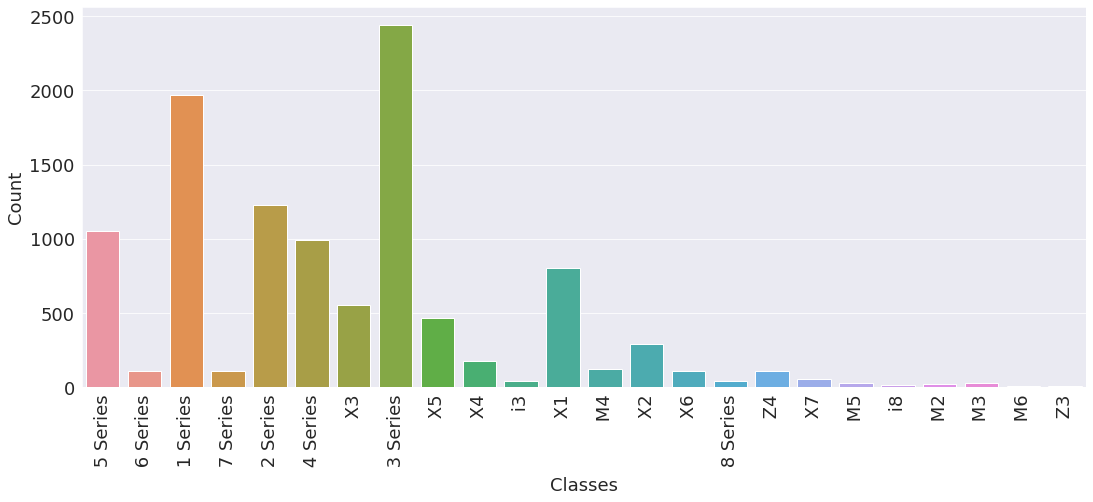

In [23]:
sns.countplot(df['model'])
plt.xlabel('Classes')
plt.ylabel("Count")
plt.xticks(rotation=90);

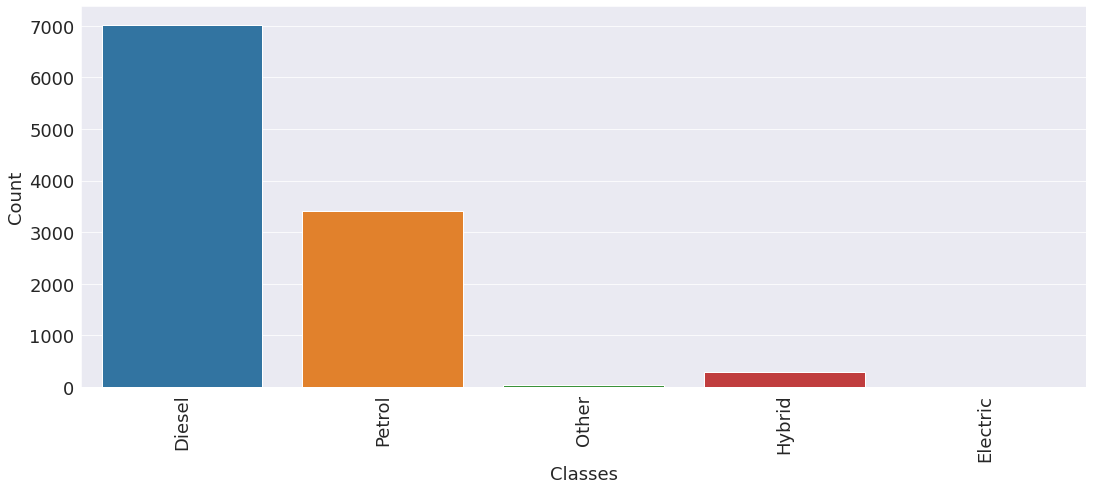

In [24]:
sns.countplot(df['fuelType'])
plt.xlabel('Classes')
plt.ylabel("Count")
plt.xticks(rotation=90);

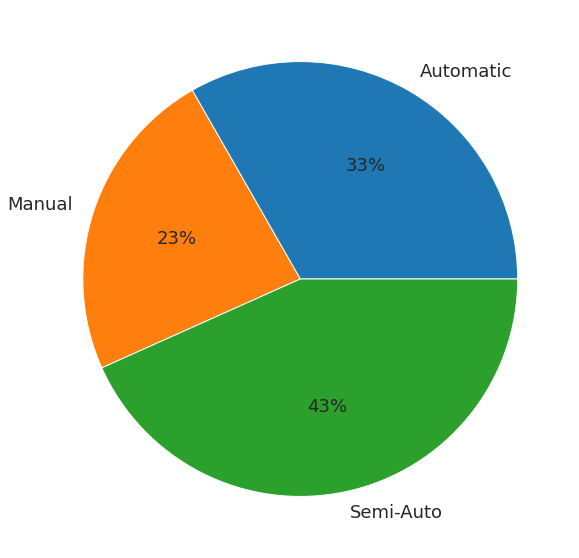

In [25]:
df_count = df.groupby(['transmission'])['year'].sum().reset_index(name='count') 
plt.figure(figsize=(10,10))
plt.pie(df_count['count'],labels=df_count['transmission'],autopct='%1.0f%%');

## Encoding

In [26]:
# Encoding of objects using Label Encoder as we dont require One-Hot Encoding

from sklearn.preprocessing import LabelEncoder

features = df.select_dtypes("object").columns

le = LabelEncoder()

for feature in features: 
    df[feature] = le.fit_transform(df[feature])

In [27]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2014,11200,0,67068,0,125,57.6,2.0
1,5,2018,27000,0,14827,4,145,42.8,2.0
2,4,2016,16000,0,62794,0,160,51.4,3.0
3,0,2017,12750,0,26676,0,145,72.4,1.5
4,6,2014,14500,0,39554,0,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,15,2016,19000,0,40818,0,150,54.3,2.0
10777,4,2016,14600,0,42947,0,125,60.1,2.0
10778,2,2017,13100,1,25468,4,200,42.8,2.0
10779,0,2014,9930,0,45000,0,30,64.2,2.0


## Target Variable Selection

In [28]:
X = df.drop(['price'],axis=1)
Y = pd.DataFrame(df['price'])


## Data Split

In [29]:
from sklearn.model_selection import train_test_split
#Splitting data into 30% for test and the rest for training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

## Model Selection

In [30]:
#SVR Model
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)

print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))

SVRModel Train Score is :  0.06139686830445645
SVRModel Test Score is :  0.06616634385773879


In [31]:
#Linear Regression Model
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

Linear Regression Train Score is :  0.7433067380332046
Linear Regression Test Score is :  0.7471233088886784
Linear Regression Coef is :  [[ 6.20199524e+02  1.91420617e+03  2.34879061e+02 -1.22137116e-01
   3.49688295e+02 -1.17962725e+01  3.60527408e+00  8.81052333e+03]]
Linear Regression intercept is :  [-3856989.18966362]


In [32]:
#Decision Tree Regressor Model
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=11,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.973560335079043
DecisionTreeRegressor Test Score is :  0.9388158456640128


In [33]:
#Random Forest Regressor Model
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)

Random Forest Regressor Train Score is :  0.9754411464767445
Random Forest Regressor Test Score is :  0.9548297743798986
Random Forest Regressor No. of features are :  8


## Model Evaluation

In [34]:
predicted= RandomForestRegressorModel.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1615.931583880018
Mean Squared Error: 5659798.751902085
Root Mean Squared Error: 2379.0331548555782


# Model has been developed with 95% accuracy using Random Forest Tree Classifier